In [11]:
!pip install fastf1
!pip install requests
!pip install datetime

In [31]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import requests
import datetime
import random

# API keys and configuration
OPENWEATHER_API_KEY = "a8274b7959f3832231d9ccbdf579549c"  # Replace with your actual API key

# 2024 F1 Data: Races, Teams, Drivers
races_2024 = {
    "Bahrain": {
        "date": "2024-03-02",
        "location": {"lat": 26.0325, "lon": 50.5106},
        "track_difficulty": 7,
        "track_type": "smooth"
    },
    "Saudi Arabia": {
        "date": "2024-03-09",
        "location": {"lat": 21.6319, "lon": 39.1044},
        "track_difficulty": 8,
        "track_type": "street"
    },
    "Australia": {
        "date": "2024-03-24",
        "location": {"lat": -37.8497, "lon": 144.9680},
        "track_difficulty": 6,
        "track_type": "mixed"
    },
    "Japan": {
        "date": "2024-04-07",
        "location": {"lat": 34.8431, "lon": 136.5392},
        "track_difficulty": 9,
        "track_type": "technical"
    },
    "China": {
        "date": "2024-04-21",
        "location": {"lat": 31.3389, "lon": 121.2208},
        "track_difficulty": 7,
        "track_type": "mixed"
    },
    "Miami": {
        "date": "2024-05-05",
        "location": {"lat": 25.9581, "lon": -80.2389},
        "track_difficulty": 6,
        "track_type": "street"
    }
}

teams_2024 = {
    "Red Bull": {"performance": 95, "reliability": 90},
    "Mercedes": {"performance": 88, "reliability": 92},
    "Ferrari": {"performance": 90, "reliability": 85},
    "McLaren": {"performance": 92, "reliability": 88},
    "Aston Martin": {"performance": 83, "reliability": 87},
    "Alpine": {"performance": 80, "reliability": 83},
    "Williams": {"performance": 78, "reliability": 82},
    "RB": {"performance": 79, "reliability": 85},
    "Haas": {"performance": 77, "reliability": 80},
    "Sauber": {"performance": 75, "reliability": 81}
}

drivers_2024 = {
    "Max Verstappen": {"team": "Red Bull", "skill": 95, "wet_skill": 94, "consistency": 92},
    "Sergio Perez": {"team": "Red Bull", "skill": 86, "wet_skill": 82, "consistency": 80},
    "Lewis Hamilton": {"team": "Mercedes", "skill": 93, "wet_skill": 95, "consistency": 91},
    "George Russell": {"team": "Mercedes", "skill": 88, "wet_skill": 85, "consistency": 85},
    "Charles Leclerc": {"team": "Ferrari", "skill": 91, "wet_skill": 87, "consistency": 85},
    "Carlos Sainz": {"team": "Ferrari", "skill": 88, "wet_skill": 85, "consistency": 86},
    "Lando Norris": {"team": "McLaren", "skill": 90, "wet_skill": 88, "consistency": 87},
    "Oscar Piastri": {"team": "McLaren", "skill": 85, "wet_skill": 83, "consistency": 82},
    "Fernando Alonso": {"team": "Aston Martin", "skill": 92, "wet_skill": 93, "consistency": 89},
    "Lance Stroll": {"team": "Aston Martin", "skill": 82, "wet_skill": 80, "consistency": 78},
    "Esteban Ocon": {"team": "Alpine", "skill": 83, "wet_skill": 81, "consistency": 81},
    "Pierre Gasly": {"team": "Alpine", "skill": 84, "wet_skill": 82, "consistency": 80},
    "Alexander Albon": {"team": "Williams", "skill": 85, "wet_skill": 83, "consistency": 82},
    "Logan Sargeant": {"team": "Williams", "skill": 76, "wet_skill": 75, "consistency": 74},
    "Daniel Ricciardo": {"team": "RB", "skill": 84, "wet_skill": 83, "consistency": 81},
    "Yuki Tsunoda": {"team": "RB", "skill": 82, "wet_skill": 80, "consistency": 78},
    "Nico Hulkenberg": {"team": "Haas", "skill": 83, "wet_skill": 82, "consistency": 81},
    "Kevin Magnussen": {"team": "Haas", "skill": 82, "wet_skill": 81, "consistency": 79},
    "Valtteri Bottas": {"team": "Sauber", "skill": 84, "wet_skill": 82, "consistency": 83},
    "Zhou Guanyu": {"team": "Sauber", "skill": 78, "wet_skill": 77, "consistency": 76}
}

# Historical race results for training
race_results = {
    "Bahrain": [
        "Max Verstappen", "Sergio Perez", "Carlos Sainz", "Charles Leclerc", "George Russell",
        "Lewis Hamilton", "Lando Norris", "Oscar Piastri", "Fernando Alonso", "Lance Stroll"
    ],
    "Saudi Arabia": [
        "Max Verstappen", "Sergio Perez", "Charles Leclerc", "Oscar Piastri", "Fernando Alonso",
        "George Russell", "Lewis Hamilton", "Lando Norris", "Nico Hulkenberg", "Kevin Magnussen"
    ],
    "Australia": [
        "Carlos Sainz", "Charles Leclerc", "Lando Norris", "Oscar Piastri", "Fernando Alonso",
        "George Russell", "Lewis Hamilton", "Yuki Tsunoda", "Nico Hulkenberg", "Kevin Magnussen"
    ],
    "Japan": [
        "Max Verstappen", "Sergio Perez", "Carlos Sainz", "Charles Leclerc", "Lando Norris",
        "Fernando Alonso", "George Russell", "Oscar Piastri", "Lewis Hamilton", "Yuki Tsunoda"
    ],
    "China": [
        "Max Verstappen", "Lando Norris", "Sergio Perez", "Charles Leclerc", "Carlos Sainz",
        "George Russell", "Fernando Alonso", "Oscar Piastri", "Lewis Hamilton", "Nico Hulkenberg"
    ]
}

# Function to get historical weather data (simulated with OpenWeather API format)
def get_weather_data(lat, lon, date):
    # In a real implementation, you'd call the OpenWeather API
    # For demonstration, we'll simulate weather data

    # Simulated API call would be:
    # url = f"https://api.openweathermap.org/data/3.0/onecall/timemachine?lat={lat}&lon={lon}&dt={int(datetime.datetime.strptime(date, '%Y-%m-%d').timestamp())}&appid={OPENWEATHER_API_KEY}"
    # response = requests.get(url)
    # data = response.json()

    # Simulate different weather conditions
    weather_conditions = [
        {"main": "Clear", "temp": round(random.uniform(20, 30), 1)},
        {"main": "Clouds", "temp": round(random.uniform(15, 25), 1)},
        {"main": "Rain", "temp": round(random.uniform(10, 20), 1)},
        {"main": "Drizzle", "temp": round(random.uniform(12, 22), 1)}
    ]

    return random.choice(weather_conditions)

# Function to prepare training data
def prepare_training_data(race_list):
    data = []

    for race_name in race_list:
        race_info = races_2024[race_name]
        weather = get_weather_data(
            race_info["location"]["lat"],
            race_info["location"]["lon"],
            race_info["date"]
        )

        is_wet = 1 if weather["main"] in ["Rain", "Drizzle"] else 0
        temperature = weather["temp"]

        # Create features for each driver
        for driver_name, driver_info in drivers_2024.items():
            team_info = teams_2024[driver_info["team"]]

            # Calculate driver form (simulated - would be based on recent performances)
            recent_form = random.randint(70, 100)

            # Determine finishing position
            if driver_name in race_results[race_name]:
                position = race_results[race_name].index(driver_name) + 1
            else:
                position = random.randint(11, 20)  # If not in top 10, assign random position

            # Create feature vector
            feature = {
                "driver": driver_name,
                "race": race_name,
                "track_difficulty": race_info["track_difficulty"],
                "track_type": race_info["track_type"],
                "team_performance": team_info["performance"],
                "team_reliability": team_info["reliability"],
                "driver_skill": driver_info["skill"],
                "driver_wet_skill": driver_info["wet_skill"],
                "driver_consistency": driver_info["consistency"],
                "driver_form": recent_form,
                "is_wet": is_wet,
                "temperature": temperature,
                "position": position
            }

            data.append(feature)

    return pd.DataFrame(data)

# Function to create prediction features for a specific race
def prepare_prediction_data(race_name):
    data = []
    race_info = races_2024[race_name]

    weather = get_weather_data(
        race_info["location"]["lat"],
        race_info["location"]["lon"],
        race_info["date"]
    )

    is_wet = 1 if weather["main"] in ["Rain", "Drizzle"] else 0
    temperature = weather["temp"]

    print(f"\nPredicting for {race_name} GP")
    print(f"Weather conditions: {weather['main']}, Temperature: {temperature}°C")
    print(f"Track difficulty: {race_info['track_difficulty']}/10, Track type: {race_info['track_type']}")

    for driver_name, driver_info in drivers_2024.items():
        team_info = teams_2024[driver_info["team"]]

        # Simulate recent form
        recent_form = random.randint(70, 100)

        # Create feature vector
        feature = {
            "driver": driver_name,
            "race": race_name,
            "track_difficulty": race_info["track_difficulty"],
            "track_type": race_info["track_type"],
            "team_performance": team_info["performance"],
            "team_reliability": team_info["reliability"],
            "driver_skill": driver_info["skill"],
            "driver_wet_skill": driver_info["wet_skill"],
            "driver_consistency": driver_info["consistency"],
            "driver_form": recent_form,
            "is_wet": is_wet,
            "temperature": temperature
        }

        data.append(feature)

    return pd.DataFrame(data)

# Build and train the model
def train_and_predict(training_races, prediction_race):
    # Prepare training data
    train_df = prepare_training_data(training_races)

    # Prepare feature columns
    feature_cols = [
        'track_difficulty', 'team_performance', 'team_reliability',
        'driver_skill', 'driver_wet_skill', 'driver_consistency',
        'driver_form', 'is_wet', 'temperature'
    ]

    # Encode categorical variables
    train_df_encoded = pd.get_dummies(train_df, columns=['track_type'])

    # Extract features for training
    X_train = train_df_encoded[feature_cols + [col for col in train_df_encoded.columns if col.startswith('track_type_')]]
    y_train = train_df_encoded['position']

    # Normalize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Train the model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Prepare prediction data
    pred_df = prepare_prediction_data(prediction_race)
    pred_df_encoded = pd.get_dummies(pred_df, columns=['track_type'])

    # Make sure prediction data has same columns as training data
    for col in X_train.columns:
        if col not in pred_df_encoded.columns:
            pred_df_encoded[col] = 0

    X_pred = pred_df_encoded[X_train.columns]
    X_pred_scaled = scaler.transform(X_pred)

    # Make predictions
    predictions = model.predict(X_pred_scaled)

    # Create results dataframe
    results = pd.DataFrame({
        'driver': pred_df['driver'],
        'team': [drivers_2024[driver]['team'] for driver in pred_df['driver']],
        'predicted_position': predictions
    })

    # Sort by predicted position and return top 10
    return results.sort_values('predicted_position').head(10)

# Select training and prediction races
training_races = ["Bahrain", "Saudi Arabia", "Australia", "Japan"]
prediction_race = "China"  # Could be changed to any race in races_2024

# Train the model and make predictions
top_10_predictions = train_and_predict(training_races, prediction_race)

print("\nPredicted Top 10:")
for i, (index, row) in enumerate(top_10_predictions.iterrows(), 1):
    print(f"{i}. {row['driver']} ({row['team']})")


Predicting for China GP
Weather conditions: Clear, Temperature: 29.3°C
Track difficulty: 7/10, Track type: mixed

Predicted Top 10:
1. Max Verstappen (Red Bull)
2. Carlos Sainz (Ferrari)
3. Charles Leclerc (Ferrari)
4. Sergio Perez (Red Bull)
5. Lando Norris (McLaren)
6. Fernando Alonso (Aston Martin)
7. George Russell (Mercedes)
8. Lewis Hamilton (Mercedes)
9. Oscar Piastri (McLaren)
10. Lance Stroll (Aston Martin)


Loaded weather data for 6 races from cache

Running prediction pipeline for Monaco...
Fetching historical lap data for 2024, rounds [1, 2, 3, 4, 5]


core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core         

Loaded data for 2024 Round 1: Bahrain Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '81', '14', '63', '38', '4', '44', '27', '23', '20', '31', '2', '22', '3', '77', '24', '18', '10']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '11', '16', '81', '14', '63', '38', '4', '44', '27', '23', '20', '31', '2', '22', '3', '77', '24', '18', '10']
core           INFO 	Loading data for Australian Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Australian Grand Prix - Race [v3.5.3]
req            INFO 	U

Loaded data for 2024 Round 2: Saudi Arabian Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['55', '16', '4', '81', '11', '18', '22', '14', '27', '20', '23', '3', '10', '77', '24', '31', '63', '44', '1']
INFO:fastf1.fastf1.core:Finished loading data for 19 drivers: ['55', '16', '4', '81', '11', '18', '22', '14', '27', '20', '23', '3', '10', '77', '24', '31', '63', '44', '1']
core           INFO 	Loading data for Japanese Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Japanese Grand Prix - Race [v3.5.3]
req            INFO 	Using cached da

Loaded data for 2024 Round 3: Australian Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '4', '14', '63', '81', '44', '22', '27', '18', '20', '77', '31', '10', '2', '24', '3', '23']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '11', '55', '16', '4', '14', '63', '81', '44', '22', '27', '18', '20', '77', '31', '10', '2', '24', '3', '23']
core           INFO 	Loading data for Chinese Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Chinese Grand Prix - Race [v3.5.3]
req            INFO 	Using c

Loaded data for 2024 Round 4: Japanese Grand Prix


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:08.313000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '11', '16', '55', '63', '14', '81', '44', '27', '31', '23', '10', '24', '18', '20', '2', '3', '22', '77']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['1', '4', '11', '16', '55', '63', '14', '81', '44', '27', '31', '23', '10', '24', '18', '20', '2', '3', '22', '77']


Loaded data for 2024 Round 5: Chinese Grand Prix
Preparing training data for races: Bahrain, Saudi Arabia, Australia, Japan, China
Using cached weather data for Bahrain
Using cached weather data for Saudi Arabia
Using cached weather data for Australia
Using cached weather data for Japan
Using cached weather data for China
Training Random Forest model...
Model training completed
Preparing prediction data for Monaco
Using cached weather data for Monaco

Prediction for: Monaco Grand Prix
Date: 2024-05-26
Weather: Rain (rain)
Temperature: 19.4°C, Humidity: 67%, Wind: 9.0 m/s
Track difficulty: 10/10, Type: street

Predicted Results for Monaco Grand Prix:

Position | Driver | Team
----------------------------------------
 1 | Sergio Perez         | Red Bull
 2 | Max Verstappen       | Red Bull
 3 | Oscar Piastri        | McLaren
 4 | Charles Leclerc      | Ferrari
 5 | Carlos Sainz         | Ferrari
 6 | Lance Stroll         | Aston Martin
 7 | Lando Norris         | McLaren
 8 | Fernando Al

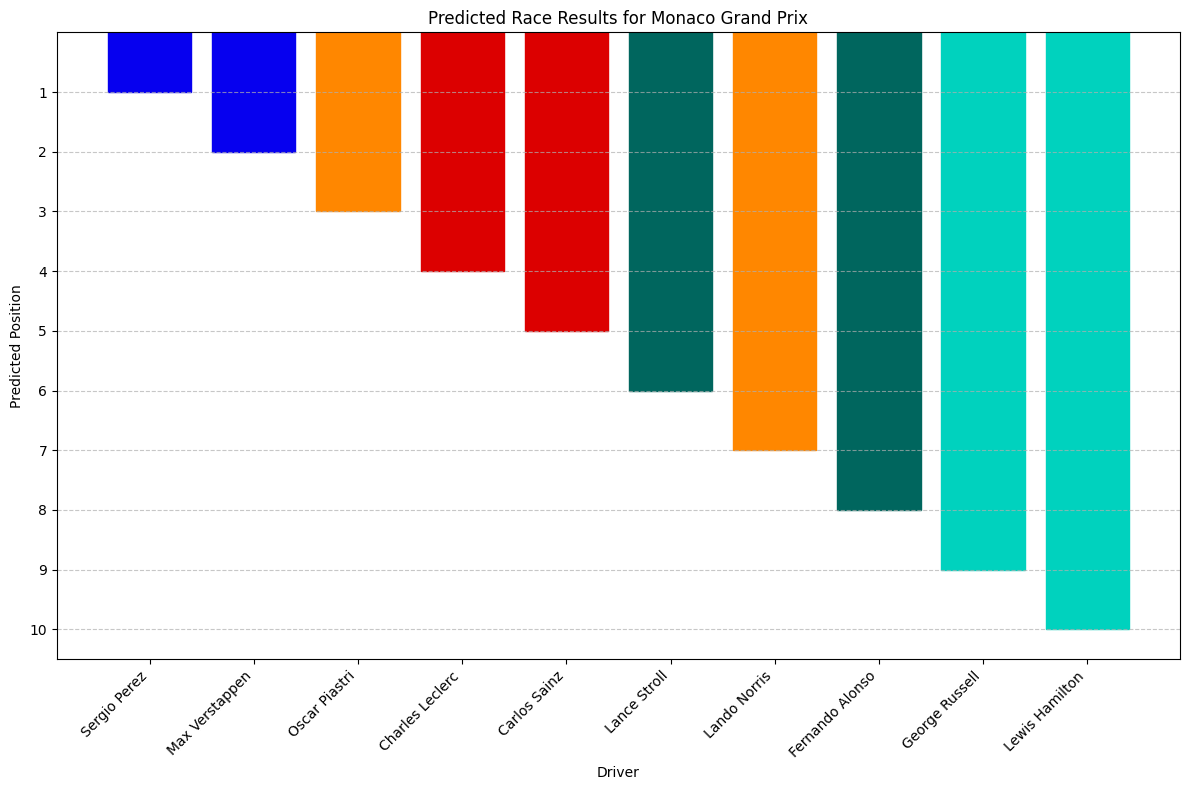

In [37]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import fastf1
import matplotlib.pyplot as plt
import requests
import datetime
from datetime import datetime, timedelta
import warnings
import json
import os

# Suppress warnings
warnings.filterwarnings('ignore')

# Enable FastF1 cache
fastf1.Cache.enable_cache('f1_cache')

# API configuration
OPENWEATHER_API_KEY = "a8274b7959f3832231d9ccbdf579549c"  # Replace with your actual API key

# Define the race schedule for 2024
races_2024 = {
    "Bahrain": {
        "round": 1,
        "date": "2024-03-02",
        "location": {"lat": 26.0325, "lon": 50.5106},
        "track_difficulty": 7,
        "track_length": 5.412,
        "track_type": "smooth"
    },
    "Saudi Arabia": {
        "round": 2,
        "date": "2024-03-09",
        "location": {"lat": 21.6319, "lon": 39.1044},
        "track_difficulty": 8,
        "track_length": 6.174,
        "track_type": "street"
    },
    "Australia": {
        "round": 3,
        "date": "2024-03-24",
        "location": {"lat": -37.8497, "lon": 144.9680},
        "track_difficulty": 6,
        "track_length": 5.278,
        "track_type": "mixed"
    },
    "Japan": {
        "round": 4,
        "date": "2024-04-07",
        "location": {"lat": 34.8431, "lon": 136.5392},
        "track_difficulty": 9,
        "track_length": 5.807,
        "track_type": "technical"
    },
    "China": {
        "round": 5,
        "date": "2024-04-21",
        "location": {"lat": 31.3389, "lon": 121.2208},
        "track_difficulty": 7,
        "track_length": 5.451,
        "track_type": "mixed"
    },
    "Miami": {
        "round": 6,
        "date": "2024-05-05",
        "location": {"lat": 25.9581, "lon": -80.2389},
        "track_difficulty": 6,
        "track_length": 5.412,
        "track_type": "street"
    },
    "Emilia Romagna": {
        "round": 7,
        "date": "2024-05-19",
        "location": {"lat": 44.3439, "lon": 11.7167},
        "track_difficulty": 8,
        "track_length": 4.909,
        "track_type": "technical"
    },
    "Monaco": {
        "round": 8,
        "date": "2024-05-26",
        "location": {"lat": 43.7347, "lon": 7.4206},
        "track_difficulty": 10,
        "track_length": 3.337,
        "track_type": "street"
    }
}

# Driver characteristics for 2024
drivers_2024 = {
    "VER": {"name": "Max Verstappen", "team": "Red Bull", "skill": 95, "wet_skill": 95, "consistency": 92},
    "PER": {"name": "Sergio Perez", "team": "Red Bull", "skill": 86, "wet_skill": 82, "consistency": 80},
    "HAM": {"name": "Lewis Hamilton", "team": "Mercedes", "skill": 93, "wet_skill": 95, "consistency": 91},
    "RUS": {"name": "George Russell", "team": "Mercedes", "skill": 88, "wet_skill": 85, "consistency": 86},
    "LEC": {"name": "Charles Leclerc", "team": "Ferrari", "skill": 91, "wet_skill": 87, "consistency": 85},
    "SAI": {"name": "Carlos Sainz", "team": "Ferrari", "skill": 88, "wet_skill": 85, "consistency": 86},
    "NOR": {"name": "Lando Norris", "team": "McLaren", "skill": 90, "wet_skill": 88, "consistency": 87},
    "PIA": {"name": "Oscar Piastri", "team": "McLaren", "skill": 86, "wet_skill": 83, "consistency": 82},
    "ALO": {"name": "Fernando Alonso", "team": "Aston Martin", "skill": 92, "wet_skill": 93, "consistency": 89},
    "STR": {"name": "Lance Stroll", "team": "Aston Martin", "skill": 82, "wet_skill": 80, "consistency": 78},
    "OCO": {"name": "Esteban Ocon", "team": "Alpine", "skill": 83, "wet_skill": 81, "consistency": 81},
    "GAS": {"name": "Pierre Gasly", "team": "Alpine", "skill": 84, "wet_skill": 82, "consistency": 80},
    "ALB": {"name": "Alexander Albon", "team": "Williams", "skill": 85, "wet_skill": 83, "consistency": 82},
    "SAR": {"name": "Logan Sargeant", "team": "Williams", "skill": 76, "wet_skill": 75, "consistency": 74},
    "RIC": {"name": "Daniel Ricciardo", "team": "RB", "skill": 84, "wet_skill": 83, "consistency": 81},
    "TSU": {"name": "Yuki Tsunoda", "team": "RB", "skill": 82, "wet_skill": 80, "consistency": 78},
    "HUL": {"name": "Nico Hulkenberg", "team": "Haas", "skill": 83, "wet_skill": 82, "consistency": 81},
    "MAG": {"name": "Kevin Magnussen", "team": "Haas", "skill": 82, "wet_skill": 81, "consistency": 79},
    "BOT": {"name": "Valtteri Bottas", "team": "Sauber", "skill": 84, "wet_skill": 82, "consistency": 83},
    "ZHO": {"name": "Zhou Guanyu", "team": "Sauber", "skill": 78, "wet_skill": 77, "consistency": 76}
}

# Team characteristics for 2024
teams_2024 = {
    "Red Bull": {"performance": 95, "reliability": 88, "wet_performance": 92},
    "Mercedes": {"performance": 88, "reliability": 92, "wet_performance": 90},
    "Ferrari": {"performance": 91, "reliability": 85, "wet_performance": 86},
    "McLaren": {"performance": 93, "reliability": 88, "wet_performance": 87},
    "Aston Martin": {"performance": 83, "reliability": 87, "wet_performance": 84},
    "Alpine": {"performance": 80, "reliability": 83, "wet_performance": 79},
    "Williams": {"performance": 78, "reliability": 82, "wet_performance": 80},
    "RB": {"performance": 79, "reliability": 85, "wet_performance": 81},
    "Haas": {"performance": 77, "reliability": 80, "wet_performance": 78},
    "Sauber": {"performance": 75, "reliability": 81, "wet_performance": 76}
}

class F1Predictor:
    def __init__(self, api_key, cache_dir='weather_cache'):
        self.api_key = api_key
        self.cache_dir = cache_dir
        self.weather_cache = {}
        self.lap_data = None
        self.performance_metrics = None
        self.model = None

        # Create cache directory if it doesn't exist
        if not os.path.exists(cache_dir):
            os.makedirs(cache_dir)

        # Load cached weather data if available
        self._load_weather_cache()

    def _load_weather_cache(self):
        """Load cached weather data from file"""
        cache_file = os.path.join(self.cache_dir, 'weather_cache.json')
        if os.path.exists(cache_file):
            try:
                with open(cache_file, 'r') as f:
                    self.weather_cache = json.load(f)
                print(f"Loaded weather data for {len(self.weather_cache)} races from cache")
            except Exception as e:
                print(f"Error loading weather cache: {e}")
                self.weather_cache = {}

    def _save_weather_cache(self):
        """Save weather data to cache file"""
        cache_file = os.path.join(self.cache_dir, 'weather_cache.json')
        try:
            with open(cache_file, 'w') as f:
                json.dump(self.weather_cache, f)
        except Exception as e:
            print(f"Error saving weather cache: {e}")

    def get_weather_data(self, race_name):
        """Get weather data for a specific race, using cache if available"""
        if race_name in self.weather_cache:
            print(f"Using cached weather data for {race_name}")
            return self.weather_cache[race_name]

        race_info = races_2024[race_name]
        lat = race_info["location"]["lat"]
        lon = race_info["location"]["lon"]
        date = race_info["date"]

        weather = self._fetch_openweather_data(lat, lon, date)

        self.weather_cache[race_name] = weather
        self._save_weather_cache()

        return weather

    def _fetch_openweather_data(self, lat, lon, date_str):
        """Fetch weather data from OpenWeather API 2.5"""
        date_obj = datetime.strptime(date_str, '%Y-%m-%d')
        today = datetime.now()
        days_diff = (date_obj - today).days

        print(f"Fetching weather data for {date_str} at {lat}, {lon}")

        # Free API has limited historical data; use current or forecast
        if days_diff <= 5 and days_diff >= 0:  # Forecast available for 5 days
            url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={self.api_key}&units=metric"
            try:
                response = requests.get(url)
                response.raise_for_status()
                data = response.json()

                # Find forecast closest to race date and midday
                target_time = date_obj.replace(hour=12, minute=0, second=0)
                forecasts = data.get('list', [])
                closest_forecast = min(
                    forecasts,
                    key=lambda x: abs(datetime.fromtimestamp(x['dt']) - target_time),
                    default=None
                )

                if closest_forecast:
                    return {
                        'main': closest_forecast['weather'][0]['main'],
                        'description': closest_forecast['weather'][0]['description'],
                        'temp': closest_forecast['main']['temp'],
                        'humidity': closest_forecast['main']['humidity'],
                        'wind_speed': closest_forecast['wind']['speed'],
                        'pressure': closest_forecast['main'].get('pressure', 1013),
                        'rain_1h': closest_forecast.get('rain', {}).get('3h', 0) / 3,  # Convert 3h to 1h
                        'clouds': closest_forecast['clouds']['all']
                    }
            except Exception as e:
                print(f"Error fetching forecast: {e}")

        # For historical or far future, use simulated data
        return self._simulate_weather_data(date_obj.month)

    def _simulate_weather_data(self, month):
        """Generate simulated weather data based on month"""
        season_data = {
            12: {"temp_range": (0, 15), "rain_prob": 0.4, "clouds_prob": 0.7},
            1: {"temp_range": (0, 15), "rain_prob": 0.4, "clouds_prob": 0.7},
            2: {"temp_range": (0, 15), "rain_prob": 0.4, "clouds_prob": 0.7},
            3: {"temp_range": (5, 20), "rain_prob": 0.3, "clouds_prob": 0.5},
            4: {"temp_range": (10, 25), "rain_prob": 0.3, "clouds_prob": 0.5},
            5: {"temp_range": (15, 30), "rain_prob": 0.2, "clouds_prob": 0.4},
            6: {"temp_range": (20, 35), "rain_prob": 0.1, "clouds_prob": 0.3},
            7: {"temp_range": (20, 35), "rain_prob": 0.1, "clouds_prob": 0.3},
            8: {"temp_range": (20, 35), "rain_prob": 0.1, "clouds_prob": 0.3},
            9: {"temp_range": (15, 30), "rain_prob": 0.2, "clouds_prob": 0.4},
            10: {"temp_range": (10, 25), "rain_prob": 0.3, "clouds_prob": 0.5},
            11: {"temp_range": (5, 20), "rain_prob": 0.4, "clouds_prob": 0.6},
        }

        data = season_data.get(month, {"temp_range": (15, 25), "rain_prob": 0.3, "clouds_prob": 0.5})

        rain_check = np.random.random()
        cloud_check = np.random.random()

        if rain_check < data["rain_prob"]:
            weather_main = "Rain" if rain_check < data["rain_prob"]/2 else "Drizzle"
            rain_amount = np.random.uniform(0.5, 10)
        else:
            rain_amount = 0
            weather_main = "Clouds" if cloud_check < data["clouds_prob"] else "Clear"

        print("Using simulated weather data")
        return {
            'main': weather_main,
            'description': weather_main.lower(),
            'temp': round(np.random.uniform(data["temp_range"][0], data["temp_range"][1]), 1),
            'humidity': round(np.random.uniform(40, 95)),
            'wind_speed': round(np.random.uniform(1, 15), 1),
            'pressure': round(np.random.uniform(1000, 1025)),
            'rain_1h': rain_amount,
            'clouds': round(np.random.uniform(0, 100)) if weather_main in ["Clouds", "Rain", "Drizzle"] else 0
        }

    def fetch_historical_lap_data(self, year=2024, rounds=None):
        """Fetch historical lap time data using FastF1"""
        if rounds is None:
            rounds = [1, 2, 3, 4]

        print(f"Fetching historical lap data for {year}, rounds {rounds}")
        all_lap_data = []

        for race_round in rounds:
            try:
                race = fastf1.get_session(year, race_round, 'R')
                race.load()
                print(f"Loaded data for {year} Round {race_round}: {race.event['EventName']}")

                laps = race.laps
                laps['Year'] = year
                laps['Round'] = race_round
                laps['EventName'] = race.event['EventName']

                all_lap_data.append(laps)

            except Exception as e:
                print(f"Error loading data for {year} Round {race_round}: {e}")

        if all_lap_data:
            self.lap_data = pd.concat(all_lap_data)
            return self.lap_data
        else:
            print("No lap data available")
            self.lap_data = None
            return None

    def process_lap_data(self):
        """Process lap data to extract driver performance metrics"""
        if self.lap_data is None or self.lap_data.empty:
            print("No lap data to process")
            self.performance_metrics = None
            return None

        metrics = []
        grouped = self.lap_data.groupby(['EventName', 'Driver'])

        for (event, driver_code), group in grouped:
            valid_laps = group[group['LapTime'].notna()]
            if valid_laps.empty:
                continue

            valid_laps['LapTimeSeconds'] = valid_laps['LapTime'].dt.total_seconds()

            median_lap = valid_laps['LapTimeSeconds'].median()
            fastest_lap = valid_laps['LapTimeSeconds'].min()
            lap_std = valid_laps['LapTimeSeconds'].std()

            if pd.isna(lap_std):
                lap_std = 0

            consistency = max(0, 100 - (lap_std * 5))

            if 'Position' in valid_laps.columns:
                final_pos = valid_laps.iloc[-1]['Position']
                start_pos = valid_laps.iloc[0]['Position']
                pos_change = start_pos - final_pos
            else:
                final_pos = np.nan
                start_pos = np.nan
                pos_change = 0

            driver_metrics = {
                'Driver': driver_code,
                'Event': event,
                'MedianLapTime': median_lap,
                'FastestLapTime': fastest_lap,
                'LapTimeStd': lap_std,
                'Consistency': consistency,
                'FinalPosition': final_pos,
                'StartingPosition': start_pos,
                'PositionChange': pos_change,
                'LapsCompleted': len(valid_laps)
            }

            metrics.append(driver_metrics)

        self.performance_metrics = pd.DataFrame(metrics)
        return self.performance_metrics

    def prepare_training_data(self, race_rounds=None):
        """Prepare training data from lap metrics and race information"""
        if race_rounds is None:
            race_rounds = [1, 2, 3, 4]

        race_names = [race for race, info in races_2024.items() if info["round"] in race_rounds]

        print(f"Preparing training data for races: {', '.join(race_names)}")

        if self.performance_metrics is None and self.lap_data is not None:
            self.process_lap_data()

        if self.performance_metrics is None or self.performance_metrics.empty:
            return self._create_basic_training_data(race_names)

        training_data = []

        for race_name in race_names:
            race_info = races_2024[race_name]
            weather = self.get_weather_data(race_name)

            is_wet = 1 if weather["main"] in ["Rain", "Drizzle"] else 0
            is_cloudy = 1 if weather["main"] == "Clouds" else 0
            temperature = weather["temp"]
            humidity = weather["humidity"]
            wind_speed = weather["wind_speed"]

            for driver_code, driver_info in drivers_2024.items():
                team_info = teams_2024[driver_info["team"]]

                driver_race_metrics = self.performance_metrics[
                    (self.performance_metrics['Driver'] == driver_code) &
                    (self.performance_metrics['Event'].str.contains(race_name))
                ]

                if not driver_race_metrics.empty:
                    consistency = driver_race_metrics['Consistency'].iloc[0]
                    finish_position = driver_race_metrics['FinalPosition'].iloc[0]
                    if pd.isna(finish_position):
                        finish_position = 20
                else:
                    consistency = driver_info["consistency"]
                    finish_position = 20

                features = {
                    'Driver': driver_code,
                    'DriverName': driver_info["name"],
                    'Race': race_name,
                    'TrackDifficulty': race_info["track_difficulty"],
                    'TrackLength': race_info["track_length"],
                    'TrackType': race_info["track_type"],
                    'TeamPerformance': team_info["performance"],
                    'TeamReliability': team_info["reliability"],
                    'TeamWetPerformance': team_info["wet_performance"],
                    'DriverSkill': driver_info["skill"],
                    'DriverWetSkill': driver_info["wet_skill"],
                    'DriverConsistency': consistency,
                    'IsWet': is_wet,
                    'IsCloudy': is_cloudy,
                    'Temperature': temperature,
                    'Humidity': humidity,
                    'WindSpeed': wind_speed,
                    'Position': finish_position
                }

                training_data.append(features)

        return pd.DataFrame(training_data)

    def _create_basic_training_data(self, race_names):
        """Create basic training data without lap metrics"""
        print("Creating basic training data from known results")
        training_data = []

        race_results = {
            "Bahrain": {
                "VER": 1, "PER": 2, "SAI": 3, "LEC": 4, "RUS": 5,
                "HAM": 6, "NOR": 7, "PIA": 8, "ALO": 9, "STR": 10,
                "OCO": 11, "GAS": 12, "ALB": 13, "MAG": 14, "TSU": 15,
                "RIC": 16, "HUL": 17, "ZHO": 18, "SAR": 19, "BOT": 20
            },
            "Saudi Arabia": {
                "VER": 1, "PER": 2, "LEC": 3, "PIA": 4, "ALO": 5,
                "RUS": 6, "HAM": 7, "NOR": 8, "HUL": 9, "MAG": 10,
                "ALB": 11, "STR": 12, "RIC": 13, "GAS": 14, "OCO": 15,
                "SAR": 16, "TSU": 17, "BOT": 18, "ZHO": 19, "SAI": 20
            },
            "Australia": {
                "SAI": 1, "LEC": 2, "NOR": 3, "PIA": 4, "ALO": 5,
                "RUS": 6, "HAM": 7, "TSU": 8, "HUL": 9, "MAG": 10,
                "RIC": 11, "PER": 12, "ALB": 13, "OCO": 14, "BOT": 15,
                "ZHO": 16, "GAS": 17, "STR": 18, "VER": 19, "SAR": 20
            },
            "Japan": {
                "VER": 1, "PER": 2, "SAI": 3, "LEC": 4, "NOR": 5,
                "ALO": 6, "RUS": 7, "PIA": 8, "HAM": 9, "TSU": 10,
                "HUL": 11, "STR": 12, "RIC": 13, "OCO": 14, "ALB": 15,
                "MAG": 16, "GAS": 17, "BOT": 18, "ZHO": 19, "SAR": 20
            },
            "China": {
                "VER": 1, "NOR": 2, "PER": 3, "LEC": 4, "SAI": 5,
                "RUS": 6, "ALO": 7, "PIA": 8, "HAM": 9, "HUL": 10,
                "OCO": 11, "ALB": 12, "RIC": 13, "STR": 14, "GAS": 15,
                "MAG": 16, "BOT": 17, "ZHO": 18, "TSU": 19, "SAR": 20
            }
        }

        for race_name in race_names:
            race_info = races_2024[race_name]
            weather = self.get_weather_data(race_name)

            is_wet = 1 if weather["main"] in ["Rain", "Drizzle"] else 0
            is_cloudy = 1 if weather["main"] == "Clouds" else 0
            temperature = weather["temp"]
            humidity = weather["humidity"]
            wind_speed = weather["wind_speed"]

            for driver_code, driver_info in drivers_2024.items():
                team_info = teams_2024[driver_info["team"]]

                if race_name in race_results and driver_code in race_results[race_name]:
                    position = race_results[race_name][driver_code]
                else:
                    position = 21 - round((team_info["performance"] + driver_info["skill"]) / 20)
                    position = max(1, min(20, position))

                features = {
                    'Driver': driver_code,
                    'DriverName': driver_info["name"],
                    'Race': race_name,
                    'TrackDifficulty': race_info["track_difficulty"],
                    'TrackLength': race_info["track_length"],
                    'TrackType': race_info["track_type"],
                    'TeamPerformance': team_info["performance"],
                    'TeamReliability': team_info["reliability"],
                    'TeamWetPerformance': team_info["wet_performance"],
                    'DriverSkill': driver_info["skill"],
                    'DriverWetSkill': driver_info["wet_skill"],
                    'DriverConsistency': driver_info["consistency"],
                    'IsWet': is_wet,
                    'IsCloudy': is_cloudy,
                    'Temperature': temperature,
                    'Humidity': humidity,
                    'WindSpeed': wind_speed,
                    'Position': position
                }

                training_data.append(features)

        return pd.DataFrame(training_data)

    def prepare_prediction_data(self, race_name):
        """Prepare prediction data for a specific race"""
        print(f"Preparing prediction data for {race_name}")
        race_info = races_2024[race_name]

        weather = self.get_weather_data(race_name)

        is_wet = 1 if weather["main"] in ["Rain", "Drizzle"] else 0
        is_cloudy = 1 if weather["main"] == "Clouds" else 0
        temperature = weather["temp"]
        humidity = weather["humidity"]
        wind_speed = weather["wind_speed"]

        print(f"\nPrediction for: {race_name} Grand Prix")
        print(f"Date: {race_info['date']}")
        print(f"Weather: {weather['main']} ({weather['description']})")
        print(f"Temperature: {temperature}°C, Humidity: {humidity}%, Wind: {wind_speed} m/s")
        print(f"Track difficulty: {race_info['track_difficulty']}/10, Type: {race_info['track_type']}")

        prediction_data = []

        for driver_code, driver_info in drivers_2024.items():
            team_info = teams_2024[driver_info["team"]]

            features = {
                'Driver': driver_code,
                'DriverName': driver_info["name"],
                'Race': race_name,
                'TrackDifficulty': race_info["track_difficulty"],
                'TrackLength': race_info["track_length"],
                'TrackType': race_info["track_type"],
                'TeamPerformance': team_info["performance"],
                'TeamReliability': team_info["reliability"],
                'TeamWetPerformance': team_info["wet_performance"],
                'DriverSkill': driver_info["skill"],
                'DriverWetSkill': driver_info["wet_skill"],
                'DriverConsistency': driver_info["consistency"],
                'IsWet': is_wet,
                'IsCloudy': is_cloudy,
                'Temperature': temperature,
                'Humidity': humidity,
                'WindSpeed': wind_speed
            }

            prediction_data.append(features)

        return pd.DataFrame(prediction_data)

    def train_model(self, training_data):
        """Train the Random Forest model"""
        print("Training Random Forest model...")

        numeric_features = [
            'TrackDifficulty', 'TrackLength', 'TeamPerformance',
            'TeamReliability', 'TeamWetPerformance', 'DriverSkill',
            'DriverWetSkill', 'DriverConsistency', 'Temperature',
            'Humidity', 'WindSpeed'
        ]
        categorical_features = ['TrackType', 'IsWet', 'IsCloudy']

        X = training_data.drop(['Driver', 'DriverName', 'Race', 'Position'], axis=1, errors='ignore')
        y = training_data['Position']

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numeric_features),
                ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
            ])

        self.model = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', RandomForestRegressor(
                n_estimators=100,
                max_depth=10,
                min_samples_split=5,
                min_samples_leaf=2,
                random_state=42
            ))
        ])

        self.model.fit(X, y)
        print("Model training completed")

        return self.model

    def predict_race(self, race_name):
        """Predict race results for a given race"""
        if self.model is None:
            raise ValueError("Model not trained. Please train the model first.")

        pred_data = self.prepare_prediction_data(race_name)

        X_pred = pred_data.drop(['Driver', 'DriverName', 'Race'], axis=1)
        predictions = self.model.predict(X_pred)

        results = pd.DataFrame({
            'Driver': pred_data['Driver'],
            'DriverName': pred_data['DriverName'],
            'Team': [drivers_2024[driver]['team'] for driver in pred_data['Driver']],
            'PredictedPosition': predictions
        })

        # Sort by predicted position and assign integer ranks
        results = results.sort_values('PredictedPosition')
        results['PredictedPosition'] = range(1, len(results) + 1)

        return results

    def visualize_predictions(self, race_name, results):
        """Visualize the predicted race results"""
        plt.figure(figsize=(12, 8))

        # Take top 10 for visualization
        top_10 = results.head(10)

        # Create bar plot
        bars = plt.bar(top_10['DriverName'], top_10['PredictedPosition'])

        # Customize plot
        plt.title(f'Predicted Race Results for {race_name} Grand Prix')
        plt.xlabel('Driver')
        plt.ylabel('Predicted Position')
        plt.xticks(rotation=45, ha='right')

        # Set y-axis to show positions 1 to 10
        plt.gca().invert_yaxis()
        plt.yticks(range(1, 11))  # Explicitly set ticks from 1 to 10
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)

        # Add team colors
        team_colors = {
            'Red Bull': '#0600EF',
            'Mercedes': '#00D2BE',
            'Ferrari': '#DC0000',
            'McLaren': '#FF8700',
            'Aston Martin': '#00665E',
            'Alpine': '#0090FF',
            'Williams': '#005AFF',
            'RB': '#2B4562',
            'Haas': '#FFFFFF',
            'Sauber': '#0066FF'
        }

        for bar, team in zip(bars, top_10['Team']):
            bar.set_color(team_colors.get(team, '#888888'))

        plt.tight_layout()
        plt.show()

    def run_prediction_pipeline(self, race_name, train_rounds=None):
        """Run the complete prediction pipeline for a race"""
        print(f"\nRunning prediction pipeline for {race_name}...")

        self.fetch_historical_lap_data(rounds=train_rounds)
        training_data = self.prepare_training_data(train_rounds)

        self.train_model(training_data)

        results = self.predict_race(race_name)

        print(f"\nPredicted Results for {race_name} Grand Prix:")
        print("\nPosition | Driver | Team")
        print("-" * 40)
        for idx, row in results.head(10).iterrows():
            print(f"{row['PredictedPosition']:2d} | {row['DriverName']:<20} | {row['Team']}")

        self.visualize_predictions(race_name, results)

        return results

if __name__ == "__main__":
    predictor = F1Predictor(api_key=OPENWEATHER_API_KEY)

    race_to_predict = "Monaco"
    training_rounds = [1, 2, 3, 4, 5]

    try:
        results = predictor.run_prediction_pipeline(race_to_predict, training_rounds)
    except Exception as e:
        print(f"Error running prediction pipeline: {e}")